<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Análisis de Datos con Python</font></h1>


# Venta de Casas en el Condado King, EE.UU.


Este conjunto de datos contiene precios de venta de casas en el condado King. Se incluyen los hogares vendidos entre mayo de 2014 y mayo de 2015.


<b>id</b> : Anotación para la casa

<b> date</b>: Fecha de venta de la casa

<b>price</b>: El precio es el objetivo a predecir

<b>bedrooms</b>: Número de habitaciones

<b>bathrooms</b>: Número de baños

<b>sqft_living</b>: Pies cuadrados de superficie de la casa

<b>sqft_lot</b>: Pies cuadrados de superficie de la propiedad

<b>floors</b> :Número de pisos (niveles) de la casa

<b>waterfront</b> :Casa con vista al mar

<b>view</b>: Casa ya vista

<b>condition</b> :Que tan buenas son en general las condiciones

<b>grade</b>: puntuación general dada a la unidad habitacional en base al sistema de puntuación del condado King

<b>sqft_above</b> : Pies cuadrados de superficie de la casa sin contar el sótano

<b>sqft_basement</b>: Pies cuadrados de superficie del sótano

<b>yr_built</b> : Año de construcción

<b>yr_renovated</b> : Año de restauración de la casa

<b>zipcode</b>: Código Postal

<b>lat</b>: Latitud (coordenada)

<b>long</b>: Longitud (coordenada)

<b>sqft_living15</b> : Superficie de la sala en 2015 (implica algunas reformas) Esto pudo haber modificado o no el área de la propiedad

<b>sqft_lot15</b> : Area de la propiedad en 2015 (implica algunas reformas)


Necesitará las siguientes librerías


In [1]:
pip install scikit-learn numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Modulo 1: Importar el Conjunto de Datos


Cargar el archivo csv:


In [3]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

Utilizamos el método <code>head</code> para mostrar las primeras 5 columnas del dataframe.


In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,NaN,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,NaN,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,NaN,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,NaN,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,NaN,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Pregunta 1

Muestre el tipo de dato de cada columna usando el atributo dtype, después tome una impresión de pantalla y envíela, incluya el código en la imagen.


In [5]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Utilizamos el método describe para obtener un resumén estadístico del dataframe.


In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Modulo 2: Disputa de Datos (Data Wrangling)


### Pregunta 2

Elimine las columnas <code>"id"</code> y <code>"Unnamed: 0"</code> del eje 1 mediante el método <code>drop()</code>, después utilice el método <code>describe()</code> para obtener un resumén estadístico de los datos. Tome una impresión de pantalla y envíela, asegurese de que el parámetro <code>inplace</code> sea <code>True</code>


In [7]:
df.drop(["id"], axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)

print(df)


                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot   
0      20141013T000000  221900.0       3.0       1.00         1180      5650  \
1      20141209T000000  538000.0       3.0       2.25         2570      7242   
2      20150225T000000  180000.0       2.0       1.00          770     10000   
3      20141209T000000  604000.0       4.0       3.00         1960      5000   
4      20150218T000000  510000.0       3.0       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0       3.0       2.50         1530      1131   
21609  20150223T000000  400000.0       4.0       2.50         2310      5813   
21610  20140623T000000  402101.0       2.0       0.75         1020      1350   
21611  20150116T000000  400000.0       3.0       2.50         1600      2388   
21612  20141015T000000  325000.0       2.0       0.75         1020      1076   

       floors  waterfront  view  condit

Podemos observar que faltan valores en las columnas <code> bedrooms</code> y <code> bathrooms </code>


In [8]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Podemos reemplazar los valores faltantes de la columna <code>'bedrooms'</code> por la media estadística de la columna <code>'bedrooms'</code> con el método <code>replace()</code>. No olvide establecer el parametro <code>inplace</code> como <code>True</code>.


In [9]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

También reemplazaremos los valores que faltan en la columna <code>'bathrooms'</code> por la media aritmética de <code>'bathrooms'</code> con el método <code>replace</code>. No olvide establecer el parametro <code>inplace</code> como <code>True</code>.


In [10]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Modulo 3: Análisis de Datos Exploratorio


### Pregunta 3

Utilice el método <code>value_counts</code> para contabilizar el número de casa con un solo piso, use el método <code>.to_frame()</code> para convertirlo en un dataframe.


In [12]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Pregunta 4

Utilice la función <code>boxplot</code> de la librería seaborn para determinar si las casas cuando tienen o no vista al mar presentan precios atípicos.


<Axes: xlabel='waterfront', ylabel='price'>

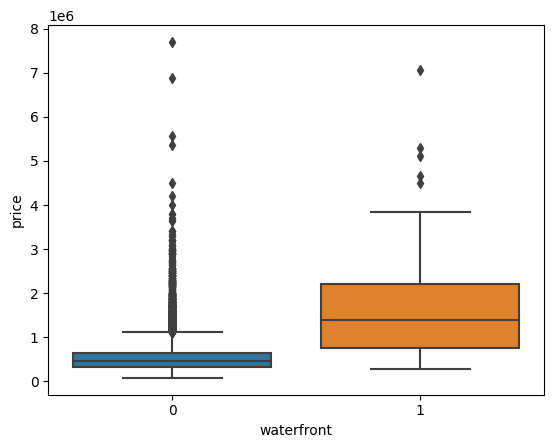

In [13]:
sns.boxplot(x="waterfront", y="price", data=df)


### Pregunta 5

Utilice la función <code>regplot</code> de la librería seaborn para determinar si la característica <code>sqft_above</code> esta relacionada con el precio negativa o positivamente.


(0.0, 8081250.0)

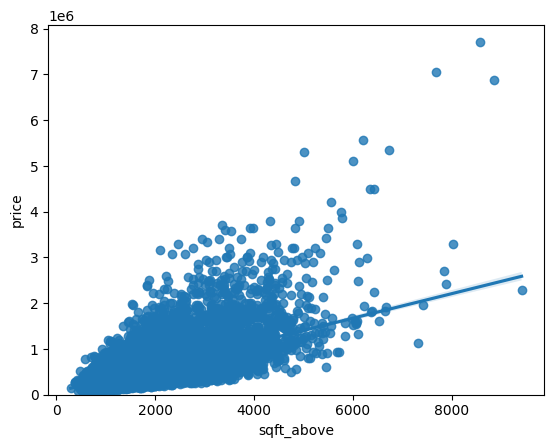

In [14]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

Podemos usar el método <code>corr()</code> de Pandas para encontrar la característica que, además del precio, esta mas correlacionada con este.


In [15]:
df['date'] = df['date'].replace('T', '', inplace=True) 

In [16]:
df['date'] = df['date'].astype(float)


In [17]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
date                  NaN
Name: price, dtype: float64

# Modulo 4: Desarrollo del Modelo


Podemos ajustar un modelo de regresión lineal utilizando la característica de longitud <code>'long'</code> y calcular R^2.


In [18]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Pregunta  6

Ajuste un modelo de regresión lineal para predecir <code>'price'</code> utilizando la característica <code>'sqft_living'</code> y despues calcule R^2. Tome una impresión de pantalla de su código y del valor de R^2.


In [19]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

### Pregunta 7

Ajuste un modelo de regresión lineal para predecir <code>'price'</code> utilizando la lista de características (features):


In [20]:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 
X = features
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
print(Yhat)

[283919.73518874 661839.73518874 307247.73518874 ... 303727.73518874
 428175.73518874 303519.73518874]


Después calcule R^2. Tome una impresión de pantalla de su código.


In [21]:
lm.score(X, Y)

0.6576883925350481

### Esto le ayudará con la Pregunta 8

Genere una lista de tuplas, el primer elemento de la tupla contiene el nombre del estimador:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

El segundo elemento de la tupla cotiene el constructor del modelo

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [22]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Pregunta 8

Utilice la lista para crear un objeto de tipo pipeline para predecir 'price', ajuste el objeto utilizando las características en la lista <code>features</code> y calcule R^2.


In [23]:
pipe = Pipeline(Input)

pipe.fit(X, Y)
Yhat=pipe.predict(X)
print(Yhat)
pipe.score(X, Y)


[351288. 558248. 449976. ... 416376. 458008. 416312.]


0.7512650495921595

# Modulo 5: Evaluación y Refinamiento del Modelo


Importar los módulos necesarios:


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Dividiremos los datos entre conjunto de entrenamiento y conjunto de prueba:


In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Pregunta 9

Genere y ajuste un objeto de regresión sesgada utilizando los datos de entrenamiento, establezca el parámetro de regularización a 0.1 y calcule R^2 usando los datos de prueba.


In [26]:
from sklearn.linear_model import Ridge

In [27]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
lm.score(x_test, y_test)

0.6494475020923869

### Pregunta 10

Realice una transformación polinómica de segundo grado en los conjuntos de entrenamiento y prueba. Genere y ajuste un objeto de regresión sesgada con los datos de entrenamiento, establezca el parametro de regularización a 0.1 y calcule R^2 con los datos de prueba. Tome una impresión de pantalla de su codigo y el valor de R^2.


In [28]:
pol = PolynomialFeatures(degree=2)
x_train_pr = pol.fit_transform(x_train)
x_test_pr = pol.fit_transform(x_test)

In [29]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.700274427967341

<p>Una vez que termine el cuaderno tendrá que compartirlo. Seleccione el ícono en la parte superior derecha que esta marcado con rojo en la imagen de abajo, un cuadro de dialogo deberá aparecer, seleccione la opción all&nbsp;content excluding sensitive code cells (todo el contenido excluyendo las celdas de código). </p> 
<p><img width="600" src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/save_notebook.png" alt="share notebook"  style="display: block; margin-left: auto; margin-right: auto;"/></p>
        <p></p>
        <p>Después puede compartir el cuaderno&nbsp; mediante la&nbsp; URL navegando hacia abajo como se muestra en la siguiente imagen:</p>
        <p style="text-align: center;"><img width="600"  src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/url_notebook.png" alt="HTML" style="display: block; margin-left: auto; margin-right: auto;" /></p>
        <p>&nbsp;</p>


<h2>Acerca de los autores:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01">Joseph Santarcangelo</a> es un Cientifico de Datos en IBM que posee un Doctorado en Ingeniería Electrica. Su investigación se enfoca en el uso de Aprendizaje Automático, Procesamiento de Señales y Visión Artificial para determinar el impacto de los videos en la cognición. Joseph ha trabajado para IBM desde el término de su doctorado.


Otros colaboradores: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ESedX20601300-2021-01-01">Mavis Zhou</a>
